In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import Imputer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

In [7]:
from utilitiesFunc import *
from joblib import dump

In [8]:
X_train = pd.read_csv('CSV_Data\Offline\BLE1\X_train.csv')
y_train = pd.read_csv('CSV_Data\Offline\BLE1\y_train.csv')

X_test = pd.read_csv('CSV_Data\Online\BLE1\X_test.csv')
y_test = pd.read_csv('CSV_Data\Online\BLE1\Y_test.csv')

In [9]:
pinInfo_train = pd.read_csv('CSV_Data\Offline\pinInfo.csv')
pinInfo_test = pd.read_csv('CSV_Data\Online\pinInfo.csv')

In [10]:
dict_pin_train = pinInfo_train.set_index('pinId').to_dict()
dict_pin_test = pinInfo_test.set_index('pinId').to_dict()

In [11]:
Plotting Learning Curves
train_loss = [] val_loss = []

for f in range(1, 11, 1): frac = f / 10.0 sample = data.sample(frac=frac, random_state=12345) train, validation, test = train_validation_test_split(sample)

train.sort_values("time", inplace=True)
validation.sort_values("time", inplace=True)
test.sort_values("time", inplace=True)

train_rolled = train.groupby("location").rolling(15, min_periods=1).mean().reset_index()
validation_rolled = validation.groupby("location").rolling(15, min_periods=1).mean().reset_index()
test_rolled = test.groupby("location").rolling(15, min_periods=1).mean().reset_index()

train_imputed = train.set_index("location").groupby("location").ffill()
train_imputed.fillna(0, inplace=True)
train_imputed.reset_index(inplace=True)

validation_imputed = validation.set_index("location").groupby("location").ffill()
validation_imputed.fillna(0, inplace=True)
validation_imputed.reset_index(inplace=True)

test_imputed = test.set_index("location").groupby("location").ffill()
test_imputed.fillna(0, inplace=True)
test_imputed.reset_index(inplace=True)

X_train, y_train = train_imputed[scanners].values, train_imputed["location"].values
X_validation, y_validation = validation_imputed[scanners].values, validation_imputed["location"].values
X_test, y_test = test_imputed[scanners].values, test_imputed["location"].values

enc = LabelEncoder()
y_train = enc.fit_transform(y_train)
y_validation = enc.transform(y_validation)
y_test = enc.transform(y_test)

model = MLPClassifier(size='small')
history = model.fit(X_train, y_train, X_validation, y_validation)

train_loss.append(history.history['loss'][-1])
val_loss.append(history.history['val_loss'][-1])
x = np.arange(0.1, 1.1, 0.1) plt.plot(x, train_loss, label='Training loss') plt.plot(x, val_loss, label='Validation loss') plt.legend() plt.xlabel("Dataset size") plt.ylabel("Loss") plt.show()

model.save('../Models/MLP_Classification_Ry_train_loc = pd.DataFrame()
y_train_loc['x'] = y_train['PinId'].map(dict_pin_train['x'])
y_train_loc['y'] = y_train['PinId'].map(dict_pin_train['y'])

In [12]:
y_test_loc = pd.DataFrame()
y_test_loc['x'] = y_test['PinId'].map(dict_pin_test['x'])
y_test_loc['y'] = y_test['PinId'].map(dict_pin_test['y'])

In [13]:
# Encode the label
le = LabelEncoder()
y_train_en = le.fit_transform(y_train)

c:\users\user\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Cerate classification model for Stage 1

In [14]:
pipe1 = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=-100),
    RandomForestClassifier()
)

In [15]:
gs_rf = GridSearchCV(pipe1, param_grid={}, cv=10, n_jobs=-1, verbose=10, return_train_score=True)

In [16]:
gs_fitted = gs_rf.fit(X_train,y_train_en)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.6s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    1.7s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.7s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.8s finished
c:\users\user\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
gs_fitted.cv_results_

{'mean_fit_time': array([0.12458713]),
 'mean_score_time': array([0.00218437]),
 'mean_test_score': array([0.9968254]),
 'mean_train_score': array([0.99978746]),
 'params': [{}],
 'rank_test_score': array([1]),
 'split0_test_score': array([0.98857143]),
 'split0_train_score': array([1.]),
 'split1_test_score': array([0.99428571]),
 'split1_train_score': array([0.99928571]),
 'split2_test_score': array([1.]),
 'split2_train_score': array([1.]),
 'split3_test_score': array([1.]),
 'split3_train_score': array([1.]),
 'split4_test_score': array([1.]),
 'split4_train_score': array([0.99928571]),
 'split5_test_score': array([1.]),
 'split5_train_score': array([1.]),
 'split6_test_score': array([0.99285714]),
 'split6_train_score': array([1.]),
 'split7_test_score': array([0.99285714]),
 'split7_train_score': array([1.]),
 'split8_test_score': array([1.]),
 'split8_train_score': array([1.]),
 'split9_test_score': array([1.]),
 'split9_train_score': array([0.99930314]),
 'std_fit_time': array(

In [40]:
dump(gs_rf, 'trained_models/gs_rf.joblib')

['trained_models/gs_rf.joblib']

### Cerate linearRegressor for Stage 2

In [18]:
# get output from stage 1
XX_train = gs_fitted.predict_proba(X_train)

In [19]:
# gs_lr_x.get_params()

In [20]:
pipe2 = make_pipeline(
    Ridge(random_state=1)
)

param_grid = [
    {'ridge__alpha': [1,10,50,100,250, 500, 1000, 1250, 1500, 2000]}
]

# gs_lr_x = GridSearchCV(pipe,param_grid=[{'ridge__alpha': [1,2]}],cv=3, verbose=10)
gs_lr_x = GridSearchCV(pipe2,param_grid=param_grid,cv=3,verbose=10, n_jobs=1)       
gs_lr_y = GridSearchCV(pipe2,param_grid=param_grid,cv=3,verbose=10,n_jobs=1)

In [21]:
gs_lr_x.fit(XX_train, y_train_loc['x'])
gs_lr_y.fit(XX_train, y_train_loc['y'])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] ridge__alpha=1 ..................................................
[CV] ......... ridge__alpha=1, score=-0.166747423536175, total=   0.0s
[CV] ridge__alpha=1 ..................................................
[CV] ........ ridge__alpha=1, score=-0.5620415858064154, total=   0.0s
[CV] ridge__alpha=1 ..................................................
[CV] ....... ridge__alpha=1, score=-0.06509199813239142, total=   0.0s
[CV] ridge__alpha=10 .................................................
[CV] ...... ridge__alpha=10, score=-0.22204304448642254, total=   0.0s
[CV] ridge__alpha=10 .................................................
[CV] ....... ridge__alpha=10, score=-0.6162702601447958, total=   0.0s
[CV] ridge__alpha=10 .................................................
[CV] ...... ridge__alpha=10, score=-0.11485099559613454, total=   0.0s
[CV] ridge__alpha=50 .................................................
[CV] ...... ridg

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elap

[CV] ....... ridge__alpha=250, score=-4.677478745723527, total=   0.0s
[CV] ridge__alpha=250 ................................................
[CV] ..... ridge__alpha=250, score=-0.29583651708034164, total=   0.0s
[CV] ridge__alpha=250 ................................................
[CV] ...... ridge__alpha=250, score=-0.2627447065725699, total=   0.0s
[CV] ridge__alpha=500 ................................................
[CV] ....... ridge__alpha=500, score=-4.688285602254924, total=   0.0s
[CV] ridge__alpha=500 ................................................
[CV] ...... ridge__alpha=500, score=-0.3115056189437355, total=   0.0s
[CV] ridge__alpha=500 ................................................
[CV] ..... ridge__alpha=500, score=-0.27026890768385403, total=   0.0s
[CV] ridge__alpha=1000 ...............................................
[CV] ...... ridge__alpha=1000, score=-4.694103612406426, total=   0.0s
[CV] ridge__alpha=1000 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001))]),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid=[{'ridge__alpha': [1, 10, 50, 100, 250, 500, 1000, 1250, 1500, 2000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [22]:
# gs_lr_x.cv_results_

In [23]:
# 1. First use clf model
pred_out1 = gs_rf.predict_proba(X_test)

# 2. Next use regression model
pred_x = gs_lr_x.predict(pred_out1)
pred_y = gs_lr_y.predict(pred_out1)

Mean error is 1.4784951113649014 meters


1.4784951113649014

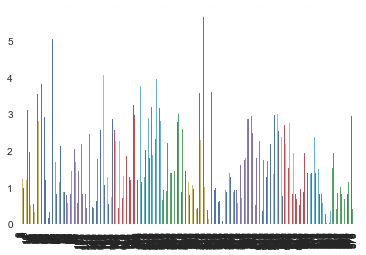

In [24]:
calError(pred_x, pred_y, y_test_loc['x'], y_test_loc['y'])

In [25]:
error_table = generateErrorTable(pred_x, pred_y, y_test_loc['x'], y_test_loc['y'], y_test['PinId'])

No handles with labels found to put in legend.


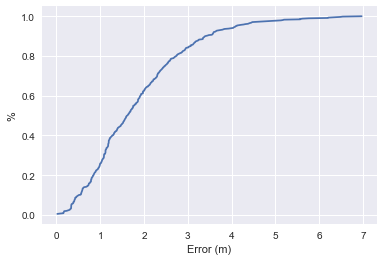

In [26]:
plot_cdf_all(error_table)

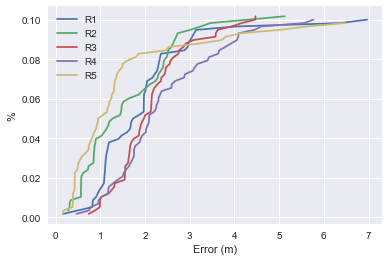

In [27]:
plot_cdf_loc(error_table, 'R1')
plot_cdf_loc(error_table, 'R2')
plot_cdf_loc(error_table, 'R3')
plot_cdf_loc(error_table, 'R4')
plot_cdf_loc(error_table, 'R5')

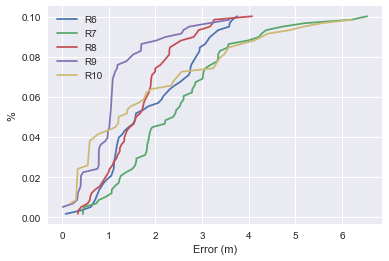

In [28]:
plot_cdf_loc(error_table, 'R6')
plot_cdf_loc(error_table, 'R7')
plot_cdf_loc(error_table, 'R8')
plot_cdf_loc(error_table, 'R9')
plot_cdf_loc(error_table, 'R10')

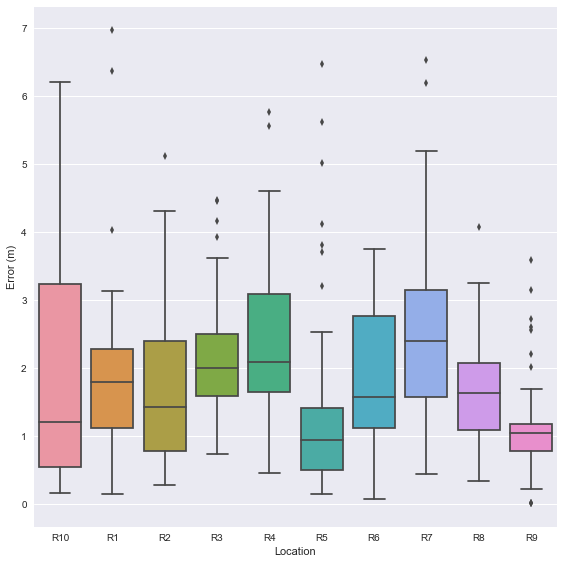

In [29]:
g = sns.factorplot('Label', 'Error', data=error_table, kind='box', size=8)
g.set_axis_labels('Location', 'Error (m)')

In [30]:
error_table.to_csv('tables/error_table.csv',index=False)

In [32]:

dump(gs_lr_x, 'trained_models/gs_lr_x.joblib')
dump(gs_lr_y, 'trained_models/gs_lr_y.joblib')

['trained_models/gs_lr_y.joblib']

### Plot results on the Map 

In [34]:
def getPredLoc(pred_x, pred_y, locLabel):
    x_loc = pred_x[y_test['PinId']==locLabel]
    y_loc = pred_y[y_test['PinId']==locLabel]
    return x_loc, y_loc

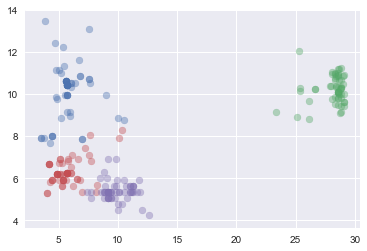

In [35]:
x_loc, y_loc = getPredLoc(pred_x, pred_y,'R10')
plt.scatter(x_loc, y_loc,alpha=0.4)
x_loc, y_loc = getPredLoc(pred_x, pred_y,'R5')
plt.scatter(x_loc, y_loc,alpha=0.4)
x_loc, y_loc = getPredLoc(pred_x, pred_y,'R1')
plt.scatter(x_loc, y_loc,alpha=0.4)
x_loc, y_loc = getPredLoc(pred_x, pred_y,'R2')
plt.scatter(x_loc, y_loc,alpha=0.4)

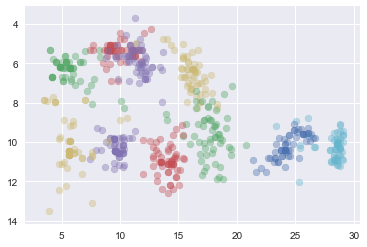

In [36]:
for i in range(11):
    label = 'R'+ np.str(i)
#     print(label)
    x_loc, y_loc = getPredLoc(pred_x, pred_y,label)
    plt.scatter(x_loc, y_loc,alpha=0.4)

plt.gca().invert_yaxis()

In [37]:
import matplotlib.image as mpimg

img =  mpimg.imread('main.png')

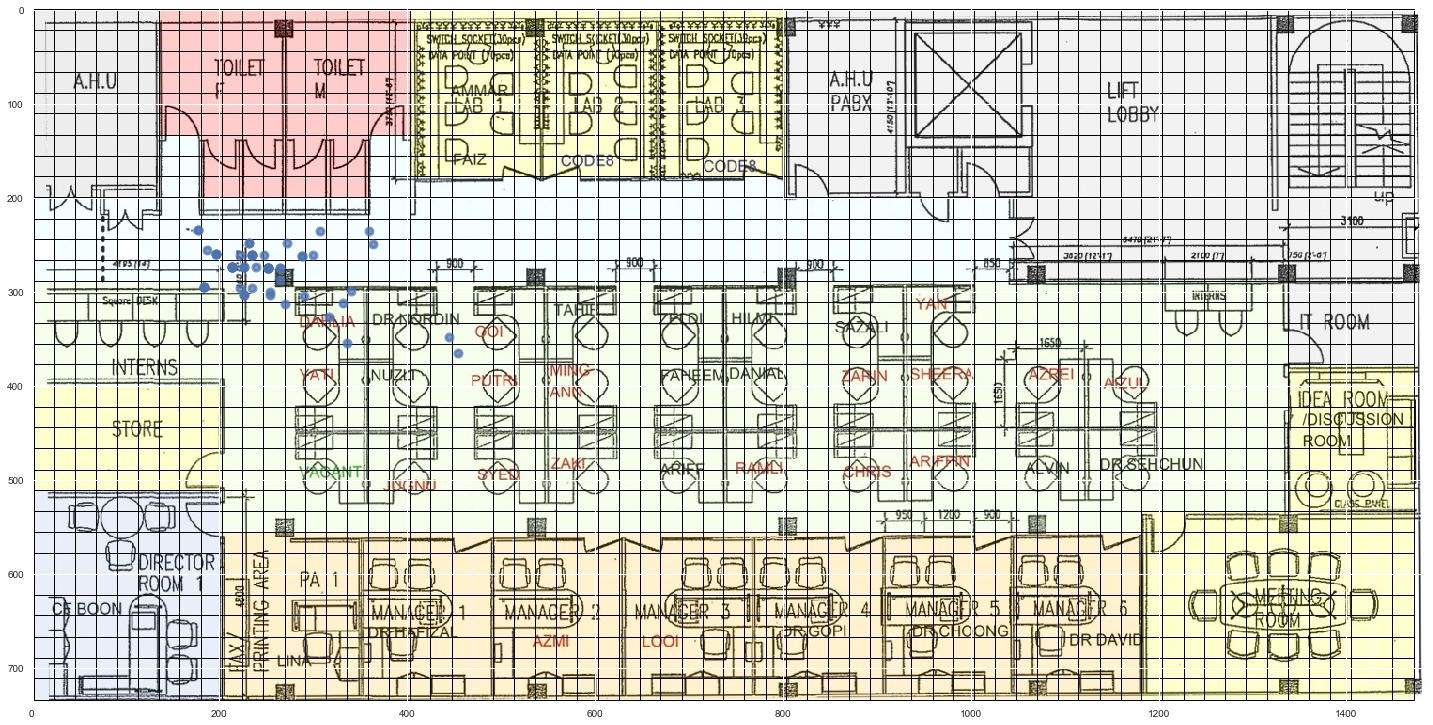

In [38]:
plt.figure(figsize=(25,25))
plt.imshow(img, origin='upper')

x_loc, y_loc = getPredLoc(pred_x, pred_y,'R1')
x_loc = x_loc*44
y_loc = y_loc*44
plt.scatter(x_loc, y_loc,alpha=0.7, linewidths=3)

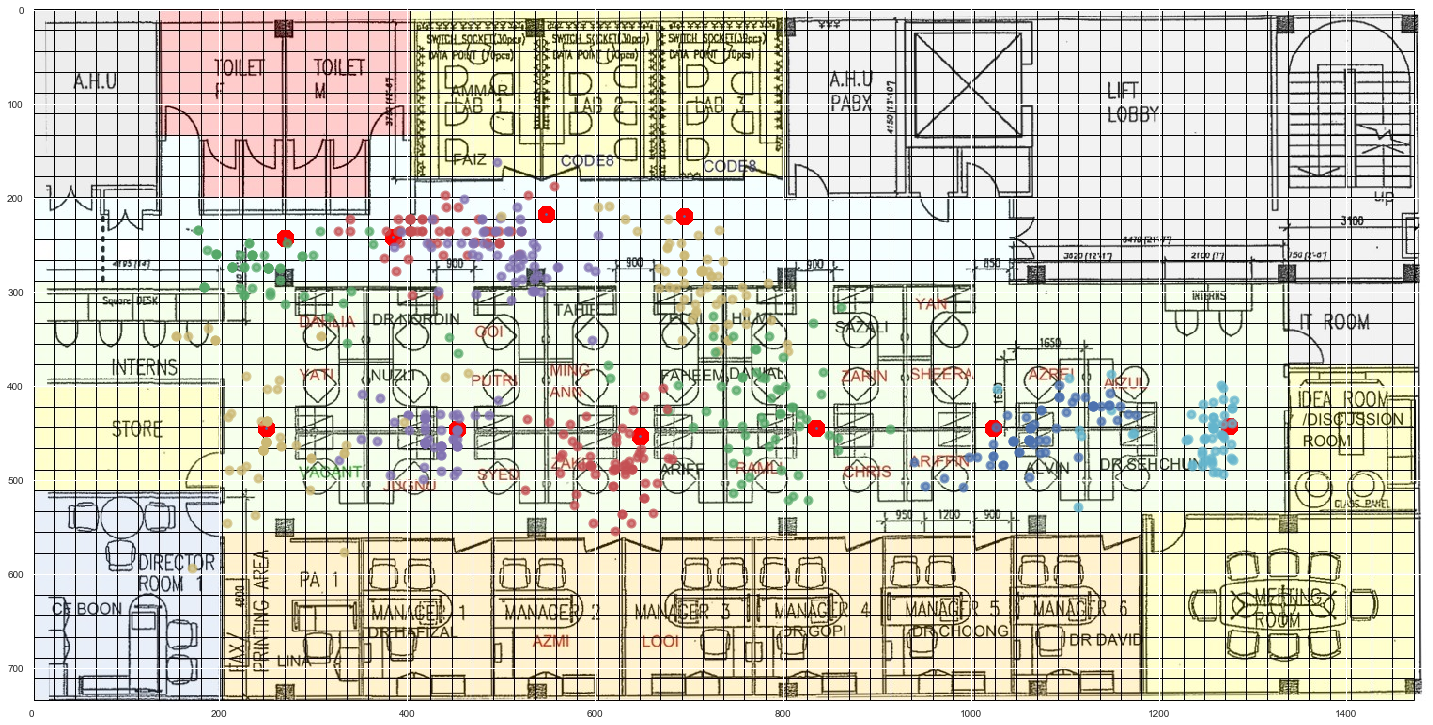

In [39]:
 plt.figure(figsize=(25,25))
plt.imshow(img)

# plot original points
x_loc_ori = y_test_loc['x']
y_loc_ori = y_test_loc['y']
x_loc_ori = x_loc_ori*44
y_loc_ori = y_loc_ori*44
plt.scatter(x_loc_ori, y_loc_ori, linewidths=10, edgecolors='r')

for i in range(1,11,1):
    label = 'R'+ np.str(i)
#     print(label)
    x_loc, y_loc = getPredLoc(pred_x, pred_y,label)
    x_loc = x_loc*44
    y_loc = y_loc*44
    plt.scatter(x_loc, y_loc,alpha=0.7, linewidths=3)
#     plt.legend(label)
    